<a href="https://colab.research.google.com/github/PaulToronto/IBM---AI-Engineering-Professional-Certificate/blob/main/1_4_Linear_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.4 Linear Classification

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import jaccard_score, classification_report, log_loss
from sklearn.metrics import f1_score, accuracy_score

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn import datasets

from sklearn.model_selection import GridSearchCV

## 1.4.1 Logistic Regression

### 1.4.1.1 Introduction to Logistic Regression

#### What is Logistic Regression?

- **Logistic regression** is a classification algorithm
- Let's say we have a telecommunications dataset that we'd like to analyze in order to understand which customers might leave us next month
- Each row represents one customer
- The target variable is `churn`
    - Indicates which customers left within the last month
- The dataset contains information about services that each customer has signed up for, customer account information and demographic information

In [2]:
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/'
data_url += 'IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/'
data_url += 'labs/Module%203/data/ChurnData.csv'

data = pd.read_csv(data_url)
data = data.head(5)
data = data[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'wireless', 'churn']]
data

,tenure,age,address,income,ed,employ,equip,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,0.0,0.0


- In logistic regression, we use one or more independent variables to predict an outcome represented by the dependent variable
- In linear regression we predicted a continuous variable
- In logistic regression we predict a binary variable, which can be coded as 0 or 1
    - The independent variables should be continuous or dummy/indicator encoded
    - Can also be used for multi-class classification (not covered in this video)

#### Logistic Regression Applications

- Predicting the probability of a person having a heart attack
- Predicting the mortality in injured patients
- Predicting customer's propensity to purchase a product or halt a subscription
- Predicting the probability of failure of a given process or product
- Predicting the likelihood of a homeowner defaulting on a mortgage

In each case, we don't just predict the class of each case, we also predict the probability of a case belonging to a specific class.

- There are different machine algorithms which can classifiy or estimate a variable
- Why choose logistic regression?
 1. If your data is binary
 2. If you need probabilistic results
 3. When you need a linear decision boundary
   - That boundary can be a line, a plane, or a hyperplane
   - Note that it is also possible to achieve a complex decision boundary using polynomial processing (out of scope for this video)
 4. If you need to understand the impact of a feature
   - You can select the best features based on the statistical significance of the logistic regression model coefficients or parameters ($\theta_1$, $\theta_2$, ...)
   - It allows us to understand the impact an independent variable has on the dependent variable while contolling other independent variables

$$
\begin{align}
\mathbf{X} &\in \mathbb{R} \\
\mathbf{y} &\in \{0,1\}
\end{align}
$$

<br>

$$
\widehat{\mathbf{y}} = \mathbf{P}\left(\mathbf{y}=1|\mathbf{x}\right)
$$

<br>

$$
\mathbf{P}\left(\mathbf{y}=0|\mathbf{x}\right) = 1 - \mathbf{P}\left(\mathbf{y}=1|\mathbf{x}\right)
$$

### 1.4.1.2 Logistic Regression vs. Linear Regression

In [3]:
data

,tenure,age,address,income,ed,employ,equip,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,0.0,0.0


- $\mathbf{y}$ is the labels vector
- $\widehat{\mathbf{y}}$ is the vector of the values predicted by our model
- If we map the target labels to integer values, $\{0,1\}$, can we use linear regression to solve this problem?
    - No

<img src='https://raw.githubusercontent.com/PaulToronto/IBM---AI-Engineering-Professional-Certificate/refs/heads/main/images/linear.png'/>

- In the above graph, $\widehat{\mathbf{y}} = a + bx_1$
- Can we use the same technique to predict a categorical target such as churn?
    - Let's try:

<img src='https://raw.githubusercontent.com/PaulToronto/IBM---AI-Engineering-Professional-Certificate/refs/heads/main/images/linear2.png'/>

- The vector, $\theta$ is the vector of parameters
    - also called the **weights factor** or **confidences** of the equation
- $\mathbf{X}$ are all the feature sets
- Our line has equation $\theta^{T}\mathbf{X} = -1 + 0.1 x_{1}$
- Now, we use this regression line to predict the churn of a new customer
- Below, we predict the class of someone with `Age = 13`

<img src='https://raw.githubusercontent.com/PaulToronto/IBM---AI-Engineering-Professional-Certificate/refs/heads/main/images/linear3.png'/>

- Class 0 is predicted
    - But, since we used linear regression, we don't have a probability

<img src='https://raw.githubusercontent.com/PaulToronto/IBM---AI-Engineering-Professional-Certificate/refs/heads/main/images/linear4.png'/>

- We used a **threshold** of 0.5
    - No matter how big the number is, as long as it is bigger than 0.5, Class 0 is predicted
    - No matter how small the number is, as long as it is less than 0.5, Class 1 is predicted
- There is no difference between a customer who has a value of 1 or 1000, the outcome is still the same

#### The Simoid Function (aka The Logistic Function)

What we need is a method that would give us a probability of falling in a particular class
    - Instead of using $\theta^{T}\mathbf{X}$, use is a function called `sigmoid`

$$
\begin{align}
\sigma\left(\theta^{T}\mathbf{X}\right) &= \sigma\left(\theta_{0} + \theta_{1}x_{1} + \dots\right) \\
\sigma\left(\theta^{T}\mathbf{X}\right) &= \frac{1}{1 + e^{-\theta^{T}\mathbf{X}}}
\end{align}
$$

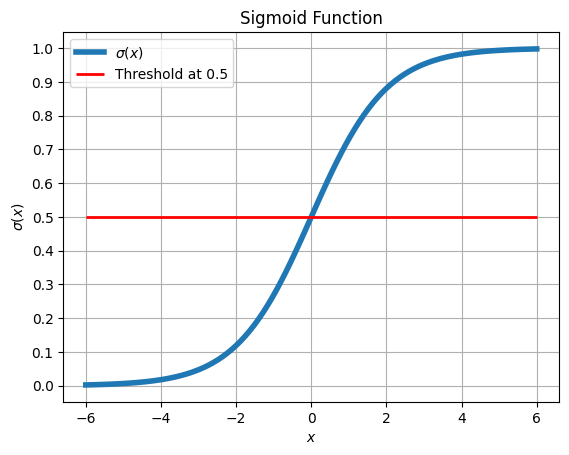

In [4]:
x = np.linspace(-6, 6, 100)
sigmoid = lambda x: 1 / (1 + np.exp(-x))

plt.plot(x, sigmoid(x), linewidth=4, label='$\sigma(x)$')
plt.hlines(0.5, -6, 6, color='red', linewidth=2, label='Threshold at 0.5')
plt.grid()
plt.xlabel('$x$')
plt.ylabel('$\sigma(x)$')
plt.yticks([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
plt.title('Sigmoid Function')
plt.legend();

#### What is the output of our model when we use logistic regression?

Now,

$$
\widehat{\mathbf{y}} = \sigma(\theta^{T}\mathbf{X})
$$

and this gives us

$$
P(\widehat{y}=1|x)
$$

- `P(Churn=1|income, age) = 0.8`
- `P(Churn-0|income, age) = 1 - 0.8 = 0.2`
- Now our job is to train the model to set its parameter values in such a way that our model is a good estimate of $P(\mathbf{y}=1|x)$

#### The Training Process

$$
\sigma\left(\theta^{T}\mathbf{X}\right) \rightarrow \mathbf{P}\left(\mathbf{y} = \mathbf{1}|\mathbf{x}\right)
$$

1. Initialize $\theta$
    - $\theta = [-1, 2]$
2. Calculate $\widehat{\mathbf{y}} =\sigma(\theta^{T}\mathbf{X})$ for a customer
    - $\widehat{\mathbf{y}} = \sigma([-1, 2] \cdot [2, 5]) = 0.997$
    - this is the probability that the customer belongs to the default class


In [5]:
sigmoid(np.array([-1, 2]).dot(np.array([2, 4])))

0.9975273768433653

3. Compare the output, $\widehat{\mathbf{y}}$ with $\mathbf{y}$ and record it as error:
    - `Error = 1 - 0.9997 = 0.0003`

4. Calculate the error for all customers.
 - Cost = $J(\theta)$
 - The cost shows how poorly the model is estimating the labels correctly
   - The lower the cost, the better the model
   - We want to minimize the cost
5. Change $\theta$ to reduce the cost
 - $\theta_{new}$
6. Go back to step 2 and iterate until the cost is low enough

#### Two questions arise from this

1. How can we change the values of $\theta$ so that the cost is reduced?
    - Gradient Descent
        - This is not the only way
2. When should we stop the interations?
    - There are various ways to do this, but essentially, you stop when the cost is satisfactory

### 1.4.1.3 Logistic Regression Training

$$
\sigma\left(\theta^{T}\mathbf{X}\right) \rightarrow \mathbf{P}\left(\mathbf{y} = \mathbf{1}|\mathbf{x}\right)
$$

Change the weights $\rightarrow$ Reduce the cost

#### Cost Function

$$
Cost\left(\widehat{y}, y\right) = \frac{1}{2}\left(\sigma(\theta^{T}\mathbf{X}) - y\right)^{2}
$$

- Look at the cost function to see the relationship between the cost function and the parameters, $\theta$
- Using the derivative of the cost function we can find how to change the parameters to reduce the cost, or rather, the error
- The cost function is the difference between the actual values, $y$, and our model's output, $\widehat{y}$
- Usually, the square is used to eliminate negative results
- Multiplying it by $\frac{1}{2}$ simplifies the math

#### Cost Function for all the samples in our training set

$$
J\left(\theta\right) = \frac{1}{m}\sum_{i=1}^{m}Cost\left(\widehat{y},y\right)
$$

#### In practice, another cost function is used

- With this function, it is easier to find its minimum because it is convex

$$
Cost\left(\widehat{y},y\right) =
\begin{cases}
-log{\left(\widehat{y}\right)} & y=1 \\
-log{\left(1 - \widehat{y}\right)} & y=0
\end{cases}
$$

#### Plotting the cost function of our model

- $y$ can be 1 or 0
- Suppose $y = 1$

$$
\begin{align}
\widehat{y} = 1 \rightarrow Cost = 0 \\
\widehat{y} = 0 \rightarrow Cost = 1
\end{align}
$$

#### Cost Function for all the samples in our training set

- This works because y can only be 0 or 1

$$
J\left(\theta\right) = \frac{1}{m}\sum_{i=1}^{m}y^{i}\log{(\widehat{y}^{i})} + (1 - y^{i})\log{(1 - \widehat{y}^{i})}
$$

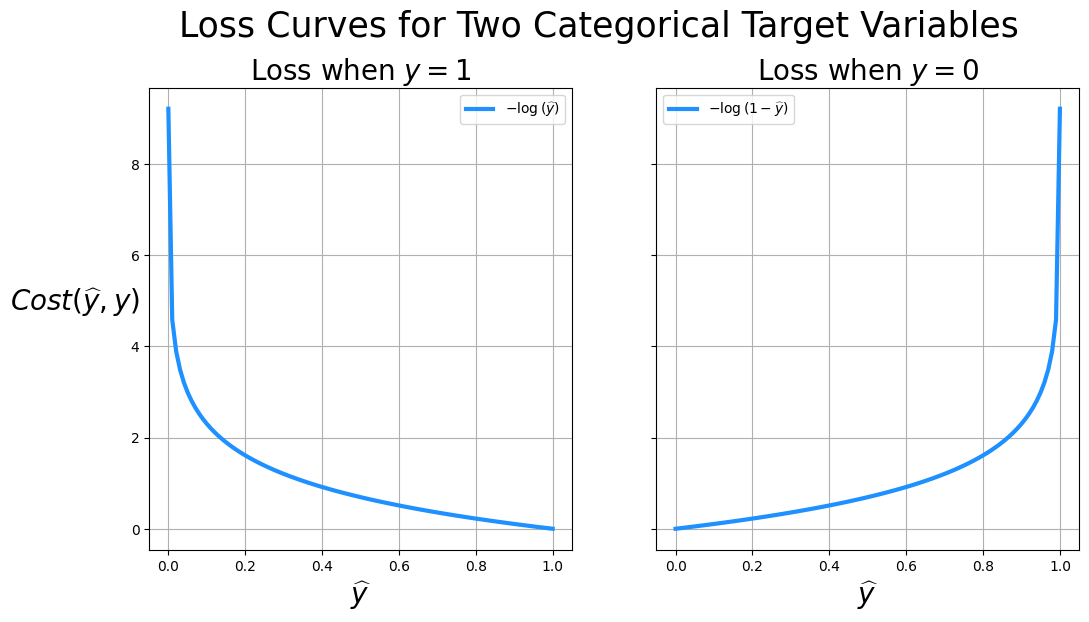

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
y_hat = np.linspace(0.0001, 0.9999, 100)

ax[0].plot(y_hat, -np.log(y_hat), color='dodgerblue', lw=3, label='$-\log{(\widehat{y})}$')
ax[0].set_title('Loss when $y = 1$', fontsize=20)
ax[0].set_xlabel('$\widehat{y}$', fontsize=20)
ax[0].set_ylabel('$Cost(\widehat{y},y)$', rotation=0, labelpad=40, fontsize=20)
ax[0].legend()
ax[0].grid()

ax[1].plot(y_hat, -np.log(1 - y_hat), color='dodgerblue', lw=3, label='$-\log{(1 - \widehat{y})}$')
ax[1].set_title('Loss when $y = 0$', fontsize=20)
ax[1].set_xlabel('$\widehat{y}$', fontsize=20)
ax[1].legend()
ax[1].grid()

plt.suptitle('Loss Curves for Two Categorical Target Variables', fontsize=25, y=1.01)
plt.show()

#### Minimizing the cost function of the model

- This is done by minimizing the cost function using **gradient descent**
- Gradient descent is an iterative approach to finding the minimum of a function
- The **derivative** of the cost function is used to change the parameter values in order to minimize the cost

#### Using gradient descent to minimize the cost

$$
J\left(\theta\right) = \frac{1}{m}\sum_{i=1}^{m}y^{i}\log{(\widehat{y}^{i})} + (1 - y^{i})\log{(1 - \widehat{y}^{i})}
$$

$$
\widehat{y} = \sigma\left(\theta_{1}x_{1} + \theta_{2}x_{2}\right)
$$

<img src='https://raw.githubusercontent.com/PaulToronto/IBM---AI-Engineering-Professional-Certificate/refs/heads/main/images/J.png'/>

- This curve is called the **error curver** or the **error bowl**
- The goal is to find the minimum value of the cost function
- Steps:
 1. Select some random parameter values that locate a point on the bowl
 2. Change parameters by $\Delta\theta_{1}$ and $\Delta\theta_{2}$ and take one step on the surface
    - As long as we are going downward, we can take one more step
    - The steeper the slope, the larger the step
    - Keep taking steps
    - To find the direction and size of the steps (in other words, how to update the parameters), the **gradient** of the cost function is calcuated at the current point
    - The gradient is the slope of the surface at each point and the direction of the gradient is the greatest uphill
    - The gradient is taken by taking the **partial derivative** of $J(\theta)$ with respect to each parameter at that point, which is the slope
    - If we move in the opposite direction of that slope, we are guaranteed to move downward on the error curve
      - For example, if we calcuate the derivative of $J$ with respent to $\theta_{1}$, we find that it is a positive number. This indicates that the function is increasing as $\theta_{1}$ increases. So to descrease $J$, we sholud move in the opposite direction. That means to move in hte direction of the negative derivative for $\theta_{1}$. We have to calculate it for other parameters as well at each step.
      - The gradient value also indicates how big of a step to take. If the slope is large, we should take a larger steop  because we are far from the minimum. If the slope is small, we should take a smaller step.
3. As we approach the lowest point, the slope diminishes, so we can take smaller steps until we reach a flat surface

<img src='https://raw.githubusercontent.com/PaulToronto/IBM---AI-Engineering-Professional-Certificate/refs/heads/main/images/J2.png'/>

$$
\frac{\partial{J}}{\partial{\theta_{1}}} = -\frac{1}{m}\sum_{i=1}^{m}\left(y^{i} - \widehat{y}^{i}\right)x_{1}^{i}
$$

- The calculatio of this partial derivative is beyond the scope of this course
- A vector of all these slopes (one element for each parameter) is called the **gradient vector** and we can use this vector to update all the parameters

$$
\Delta{J} =
\begin{bmatrix}
\frac{\partial{J}}{\partial{\theta_{1}}} \\
\frac{\partial{J}}{\partial{\theta_{2}}} \\
\frac{\partial{J}}{\partial{\theta_{2}}} \\
\vdots \\
\frac{\partial{J}}{\partial{\theta_{k}}}
\end{bmatrix}
$$

$$
New\;\theta = Old \; \theta - \mu\Delta{J}
$$

- Note also that the gradient vector is multiplied by a constant, $\mu$, which is called the learning rate.
- The learning rate gives us additional control over how fast we move on the surface

#### Training Algorithm Steps

1. Initialize the parameters randomly   
  - $\theta^{T} = \begin{bmatrix}\theta_{0} & \theta_{1} & \theta_{2} & \dots \theta_{k}\end{bmatrix}$
2. Feed the cost function with the training set, and calculate the error
  - $J\left(\theta\right) = \frac{1}{m}\sum_{i=1}^{m}y^{i}\log{(\widehat{y}^{i})} + (1 - y^{i})\log{(1 - \widehat{y}^{i})}$
  - We expect a high error rate since the parameters are set randomly
3. Calculate the gradient of the cost function
  - $\Delta{J} = \begin{bmatrix}
\frac{\partial{J}}{\partial{\theta_{1}}} &
\frac{\partial{J}}{\partial{\theta_{2}}} &
\frac{\partial{J}}{\partial{\theta_{2}}} &
\dots &
\frac{\partial{J}}{\partial{\theta_{k}}}
\end{bmatrix}$
  - We need all the training data to feed the equation for each parameter
  - This is an expensive part of the algorithm, but there are some solutions for this
4. Update weights with new values
  - $\theta_{new} = \theta_{prev} - \mu\Delta{J}$
5. Go to Step 2 and iterate until cost is small enough
6. Predict the new customer $X$
  - $\mathbf{P}\left(\mathbf{y} = \mathbf{1}|\mathbf{x}\right) = \sigma\left(\theta^{T}\mathbf{X}\right)$

### 1.4.1.4 Lab - Logistic Regression

#### Customer Churn with Logistic Regression

A telecommunications company is concerned about the number of customers leaving their land-line business for cable competitors. They need to understand who is leaving. Imagine that you are an analyst at this company and you have to find out who is leaving and why

#### The Dataset

We will use a telecommunications dataset for predicting customer churn. This is a historical customer dataset where each row represents one customer. The data is relatively easy to understand, and you may uncover insights you can use immediately. Typically it is less expensive to keep customers than acquire new ones, so the focus of this analysis is to predict the customers who will stay with the company.


This data set provides information to help you predict what behavior will help you to retain customers. You can analyze all relevant customer data and develop focused customer retention programs.



The dataset includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they had been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

In [7]:
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/'
data_url += 'IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/'
data_url += 'labs/Module%203/data/ChurnData.csv'

churn_df = pd.read_csv(data_url)
churn_df

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,55.0,44.0,24.0,83.0,1.0,23.0,0.0,1.0,0.0,17.35,...,0.0,0.0,0.0,1.0,0.0,2.854,3.199,4.419,3.0,0.0
196,34.0,23.0,3.0,24.0,1.0,7.0,0.0,1.0,0.0,6.00,...,0.0,0.0,1.0,1.0,0.0,1.792,3.332,3.178,3.0,0.0
197,6.0,32.0,10.0,47.0,1.0,10.0,0.0,1.0,0.0,3.85,...,0.0,0.0,1.0,1.0,0.0,1.348,3.168,3.850,3.0,0.0
198,24.0,30.0,0.0,25.0,4.0,5.0,0.0,1.0,1.0,8.70,...,1.0,1.0,1.0,1.0,1.0,2.163,3.866,3.219,4.0,1.0


#### Data Preprocessing and Selection

In [8]:
churn_df = churn_df.copy()[['tenure', 'age', 'address', 'income', 'ed',
                     'employ', 'equip',   'callcard', 'wireless','churn']]
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tenure    200 non-null    float64
 1   age       200 non-null    float64
 2   address   200 non-null    float64
 3   income    200 non-null    float64
 4   ed        200 non-null    float64
 5   employ    200 non-null    float64
 6   equip     200 non-null    float64
 7   callcard  200 non-null    float64
 8   wireless  200 non-null    float64
 9   churn     200 non-null    float64
dtypes: float64(10)
memory usage: 15.8 KB


In [9]:
churn_df['churn'] = churn_df['churn'].astype(int)
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tenure    200 non-null    float64
 1   age       200 non-null    float64
 2   address   200 non-null    float64
 3   income    200 non-null    float64
 4   ed        200 non-null    float64
 5   employ    200 non-null    float64
 6   equip     200 non-null    float64
 7   callcard  200 non-null    float64
 8   wireless  200 non-null    float64
 9   churn     200 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 15.8 KB


In [10]:
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


In [11]:
churn_df.shape

(200, 10)

In [12]:
X = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']]
y = churn_df['churn'].values
y

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0])

In [13]:
X = StandardScaler().fit(X).transform(X)
X

array([[-1.13518441, -0.62595491, -0.4588971 , ...,  1.6961288 ,
        -0.58477841, -0.85972695],
       [-0.11604313, -0.62595491,  0.03454064, ..., -0.6433592 ,
        -1.14437497, -0.85972695],
       [-0.57928917, -0.85594447, -0.261522  , ..., -1.42318853,
        -0.92053635, -0.85972695],
       ...,
       [-1.36680743, -0.7026181 , -0.16283445, ..., -1.42318853,
        -0.02518185, -0.85972695],
       [-0.53296457, -0.85594447, -1.14970993, ...,  0.91629947,
        -0.58477841, -0.85972695],
       [ 1.18104577,  0.67731925,  0.42929083, ..., -0.6433592 ,
         1.31784991,  1.16316   ]])

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((160, 7), (40, 7), (160,), (40,))

#### Model: Logistic Regression with Scikit-learn

Let's build our model using __LogisticRegression__ from the Scikit-learn package. This function implements logistic regression and can use different numerical optimizers to find parameters, including ‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’ solvers. You can find extensive information about the pros and cons of these optimizers if you search it in the internet.

The version of Logistic Regression in Scikit-learn, support regularization. Regularization is a technique used to solve the overfitting problem of machine learning models.
__C__ parameter indicates __inverse of regularization strength__ which must be a positive float. Smaller values specify stronger regularization.
Now let's fit our model with train set:

In [15]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train, y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [16]:
y_hat = LR.predict(X_test)
y_hat

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0])

__predict_proba__  returns estimates for all classes, ordered by the label of classes. So, the first column is the probability of class 0, P(Y=0|X), and second column is probability of class 1, P(Y=1|X):

In [17]:
y_hat_proba = LR.predict_proba(X_test)
y_hat_proba

array([[0.54132919, 0.45867081],
       [0.60593357, 0.39406643],
       [0.56277713, 0.43722287],
       [0.63432489, 0.36567511],
       [0.56431839, 0.43568161],
       [0.55386646, 0.44613354],
       [0.52237207, 0.47762793],
       [0.60514349, 0.39485651],
       [0.41069572, 0.58930428],
       [0.6333873 , 0.3666127 ],
       [0.58068791, 0.41931209],
       [0.62768628, 0.37231372],
       [0.47559883, 0.52440117],
       [0.4267593 , 0.5732407 ],
       [0.66172417, 0.33827583],
       [0.55092315, 0.44907685],
       [0.51749946, 0.48250054],
       [0.485743  , 0.514257  ],
       [0.49011451, 0.50988549],
       [0.52423349, 0.47576651],
       [0.61619519, 0.38380481],
       [0.52696302, 0.47303698],
       [0.63957168, 0.36042832],
       [0.52205164, 0.47794836],
       [0.50572852, 0.49427148],
       [0.70706202, 0.29293798],
       [0.55266286, 0.44733714],
       [0.52271594, 0.47728406],
       [0.51638863, 0.48361137],
       [0.71331391, 0.28668609],
       [0.

#### Evaluation

Let's try the **jaccard index** for accuracy evaluation. we can define jaccard as the size of the intersection divided by the size of the union of the two label sets. If the entire set of predicted labels for a sample strictly matches with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.

In [18]:
jaccard_score(y_test, y_hat, pos_label=0)

0.7058823529411765

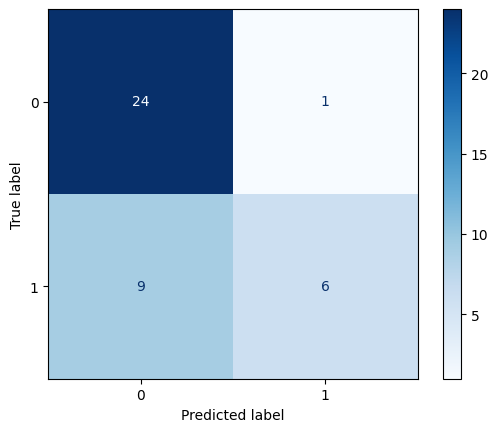

In [19]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_hat)).plot(cmap=plt.cm.Blues);

In [20]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.73      0.96      0.83        25
           1       0.86      0.40      0.55        15

    accuracy                           0.75        40
   macro avg       0.79      0.68      0.69        40
weighted avg       0.78      0.75      0.72        40



Now, let's try __log loss__ for evaluation. In logistic regression, the output can be the probability of customer churn is yes (or equals to 1). This probability is a value between 0 and 1.
Log loss( Logarithmic loss) measures the performance of a classifier where the predicted output is a probability value between 0 and 1.

In [21]:
log_loss(y_test, y_hat_proba)

0.6017092478101185

In [22]:
LR2 = LogisticRegression(C=0.01, solver='sag', max_iter=10000).fit(X_train,y_train)
y_hat_prob2 = LR2.predict_proba(X_test)
print ("LogLoss: : %.2f" % log_loss(y_test, y_hat_prob2))

LogLoss: : 0.61


## 1.4.2 Support Vector Machine

### 1.4.2.1 Support Vector Machine

#### Classification with SVM

- **SVM** is a supervised algorithm that classifies cases by finding a **separator**
  1. Works by mapping data to a **high-dimensional** feature space
    - so that data points can be categorized, even whn the data are not otherwise linearly separable
  2. A **separator** is estimated for the data
    - the data should be transformed in such a way so that a separator can be drawn as a hyperplane
    - <img src='https://raw.githubusercontent.com/PaulToronto/IBM---AI-Engineering-Professional-Certificate/refs/heads/main/images/svm1.png'/>
    - above we have linearly non-separable data which is the case for most real world data
    - <img src='https://raw.githubusercontent.com/PaulToronto/IBM---AI-Engineering-Professional-Certificate/refs/heads/main/images/svm3.png'/>
    - If we map/transform this data to a higher-dimensional space (for example three-dimensional) the categories can be defined by hyperplane
    - The SVM algorithm outputs an optimal hyperplan that categorizes new examples
    - This raises two questions:
      1. How do we transform data in such a way that a separator can be drawn as a hyperplane?
      2. How can we find the best/optimized hyperplane after the transformation?


#### Data transformation

<img src='https://raw.githubusercontent.com/PaulToronto/IBM---AI-Engineering-Professional-Certificate/refs/heads/main/images/transformation1.png'/>

- In this case, the hyperplane is a line as we go from one dimension to two
- After the transformation, we can use this line to classify new cases
- Mapping data to a higher-dimensional space is called **kernelling**
- The mathematical function used for the transformation is known as the **kernel function**
  - $\phi(x) = [x,x^{2}]$
- The kernel function can be of different types such as:
  - linear
  - polynomial
  - Radial Basis Function (RBF)
  - sigmoid
- Each of thse functions has its own characteristics, it's pros and cons and its equation
- There is no easy way of knowning which kernel function performs best for a given dataset

#### Using SVM to find the hyperplane

- How do we find the optimized separator after the tranformation?
- SVMs are based on the idea of finding the hyperplane that best divides the dataset into two classes

<img src='https://raw.githubusercontent.com/PaulToronto/IBM---AI-Engineering-Professional-Certificate/refs/heads/main/images/hyper4.png'/>

- One reasonable choise as the best hyperplane is the one that represents the largest separation or **margin** between the two classes
    - We want as big a margin as possible
- Examples closest to the hyperplane are called **support vectors**
    - We want the hyperplane that has the maximum distance to support vectors
    - Only support vectors matter in achieving our goal
- Hyperplane and boundary decision lines each have their own equations
- Finding the optimized hyperplane can be formalized by using an equation:

Find $\mathbf{w}$ and $b$  such that

$$
\mathbf{\phi}(\mathbf{w}) = \frac{1}{2}\mathbf{w}^{T}\mathbf{w}
$$

is minimized; and for all

$$
\{\left(\mathbf{x}_{1},y_{1}\right)\} : y_{i}\left(\mathbf{w}^{T}\mathbf{x}_i + b\right) \geq 1
$$

- The hyperplane is leaned from training data using an optimization procedure that maximizes the margin
  - This optimization problem can be solved by **gradient descent**
- The output of the algorithm are the values $\mathbf{w}$ and $b$ for the line
  - It is enough to plug in these values to find the line and then calculate whether an unknown point is above or below the line
     - If the equation returns a value greater than 0, then the point belongs to the first class which is above the line, and vice-versa

#### Pros and Cons of SVM

##### Pros

- Accurate in high-dimensional spaces
- Memore efficient since they use a subset of the training points (the support vectors)

##### Cons

- Prone to overfitting if the number of features is much greater than the number of samples
- They do not directly provide probability estimates which are desirable in most classification problems
- Not efficient computationally for very large datasets (more than 1000 rows)

#### SVM applications

- Image recognition
- Text category assignment due to its effectiveness in dealing with high-dimensional data
- Detecting spam
- Sentiment analysis
- Gene Expression Classification
- Regression, outlier detection and clustering

### 1.4.2.2 Lab - Support Vector Machines

In this lab you will use SVM (Support Vector Machines) to build and train a model using human cell records, and classify cells to whether the samples are benign or malignant.

SVM works by mapping data to a high-dimensional feature space so that data points can be categorized, even when the data are not otherwise linearly separable. A separator between the categories is found, then the data is transformed in such a way that the separator could be drawn as a hyperplane. Following this, characteristics of new data can be used to predict the group to which a new record should belong.

#### Load the Cancer Data

The example is based on a dataset that is publicly available from the UCI Machine Learning Repository (Asuncion and Newman, 2007)[http://mlearn.ics.uci.edu/MLRepository.html]. The dataset consists of several hundred human cell sample records, each of which contains the values of a set of cell characteristics. The fields in each record are:

|Field name|Description|
|--- |--- |
|ID|Clump thickness|
|Clump|Clump thickness|
|UnifSize|Uniformity of cell size|
|UnifShape|Uniformity of cell shape|
|MargAdh|Marginal adhesion|
|SingEpiSize|Single epithelial cell size|
|BareNuc|Bare nuclei|
|BlandChrom|Bland chromatin|
|NormNucl|Normal nucleoli|
|Mit|Mitoses|
|Class|Benign or malignant|

In [23]:
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/'
data_url += 'IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/'
data_url += 'labs/Module%203/data/cell_samples.csv'

cell_df = pd.read_csv(data_url)
cell_df

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [24]:
cell_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           699 non-null    int64 
 1   Clump        699 non-null    int64 
 2   UnifSize     699 non-null    int64 
 3   UnifShape    699 non-null    int64 
 4   MargAdh      699 non-null    int64 
 5   SingEpiSize  699 non-null    int64 
 6   BareNuc      699 non-null    object
 7   BlandChrom   699 non-null    int64 
 8   NormNucl     699 non-null    int64 
 9   Mit          699 non-null    int64 
 10  Class        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [25]:
for col in ['Clump', 'UnifSize', 'UnifShape', 'MargAdh',
            'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl',	'Mit']:
            print(sorted(np.unique(cell_df[col])))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
['1', '10', '2', '3', '4', '5', '6', '7', '8', '9', '?']
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[1, 2, 3, 4, 5, 6, 7, 8, 10]


In [26]:
cell_df['BareNuc'].value_counts()

,count
BareNuc,
1,402
10,132
2,30
5,30
3,28
8,21
4,19
?,16
9,9


It looks like the __BareNuc__ column includes some values that are not numerical. We can drop those rows.

In [27]:
 use_as_filter = pd.to_numeric(cell_df['BareNuc'], errors='coerce').notnull()
 use_as_filter

,BareNuc
0,True
1,True
2,True
3,True
4,True
...,...
694,True
695,True
696,True
697,True


In [28]:
cell_df.shape

(699, 11)

In [29]:
cell_df = cell_df[use_as_filter].copy()
cell_df.shape

(683, 11)

In [30]:
cell_df['BareNuc'] = cell_df['BareNuc'].astype(int)
cell_df.dtypes

,0
ID,int64
Clump,int64
UnifSize,int64
UnifShape,int64
MargAdh,int64
SingEpiSize,int64
BareNuc,int64
BlandChrom,int64
NormNucl,int64
Mit,int64


In [31]:
# benign: 2
# malignant: 4
cell_df['Class'].value_counts()

,count
Class,
2,444
4,239


#### Train Test Split

In [32]:
y = cell_df['Class']
y.head()

,Class
0,2
1,2
2,2
3,2
4,2


In [33]:
X = cell_df.drop(['ID', 'Class'], axis=1)
X.head()

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((546, 9), (137, 9), (546,), (137,))

#### Model (SVM with Scikit-Learn)

The SVM algorithm offers a choice of kernel functions for performing its processing. Basically, mapping data into a higher dimensional space is called kernelling. The mathematical function used for the transformation is known as the kernel function, and can be of different types, such as:

1. Linear
2. Polynomial
3. Radial basis function (RBF)
4. Sigmoid

Each of these functions has its characteristics, its pros and cons, and its equation, but as there's no easy way of knowing which function performs best with any given dataset. We usually choose different functions in turn and compare the results. Let's just use the default, RBF (Radial Basis Function) for this lab.

In [35]:
clf = SVC(kernel='rbf')
clf.fit(X_train, y_train)

SVC()

In [36]:
y_hat = clf.predict(X_test)
y_hat

array([2, 4, 2, 4, 2, 2, 2, 2, 4, 2, 2, 4, 4, 4, 4, 2, 2, 2, 2, 2, 4, 2,
       4, 4, 4, 4, 2, 2, 4, 4, 4, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4,
       4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 4, 4, 2, 4, 4,
       4, 2, 2, 2, 4, 4, 2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 4, 4, 2, 4,
       2, 2, 4, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 4, 2, 4, 2, 2, 4,
       2, 2, 4, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 2, 2, 4, 2, 2, 4, 2, 4, 2,
       2, 2, 2, 2, 4])

#### Evaluation

In [37]:
cm = confusion_matrix(y_test, y_hat, labels=[2, 4])
cm

array([[85,  5],
       [ 0, 47]])

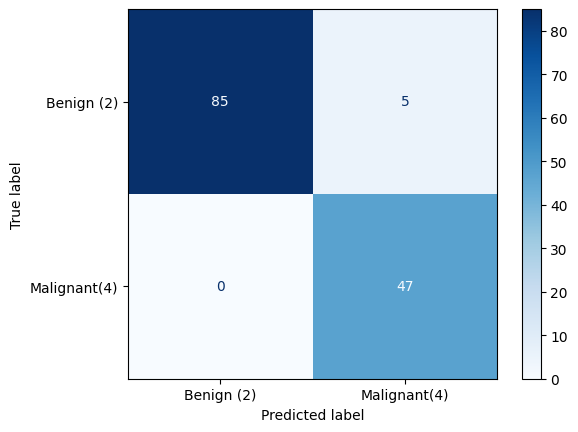

In [38]:
ConfusionMatrixDisplay(cm, display_labels=['Benign (2)', 'Malignant(4)']).plot(cmap=plt.cm.Blues);

In [39]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137



In [40]:
f1_score(y_test, y_hat, average='weighted')

0.9639038982104676

In [41]:
jaccard_score(y_test, y_hat, pos_label=2)

0.9444444444444444

#### Practice

Can you rebuild the model, but this time with a __linear__ kernel? You can use __kernel='linear'__ option, when you define the svm. How the accuracy changes with the new kernel function?

In [42]:
clf2 = SVC(kernel='linear').fit(X_train, y_train)
clf2

SVC(kernel='linear')

In [43]:
y_hat2 = clf2.predict(X_test)
y_hat2

array([2, 4, 2, 4, 2, 2, 2, 2, 4, 2, 2, 4, 4, 4, 4, 2, 2, 2, 2, 2, 4, 2,
       4, 4, 4, 4, 2, 2, 4, 4, 4, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4,
       4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 4, 4, 2, 4, 4,
       4, 2, 2, 2, 4, 4, 2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 4, 4, 2, 4,
       2, 2, 4, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 4, 2, 4, 2, 2, 4,
       2, 2, 4, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 2, 2, 4, 2, 2, 4, 2, 4, 2,
       2, 2, 2, 2, 4])

In [44]:
f1_score(y_test, y_hat2, average='weighted'), jaccard_score(y_test, y_hat2, pos_label=2)

(0.9639038982104676, 0.9444444444444444)

## 1.4.3 Multiclass Prediction

### 1.4.3.1 Reading - Multiclass Prediction

- In multiclass classification, data is classified into multiple class labels
- Unlike classification trees and nearest neighbours, the concept of multiclass classification for linear classifiers is not as straightforward
- Logistic regression cacan be converted to multiclass classification using **multinomial logistic regression** or **SoftMax** regression
    - this is a generalization of logistic regression
    - Softmax regression will not work for Support Vector Machines (SVM)
- **One versus All (aka One vs Rest)** and **One versus One** are techniques that can covnert most binary classifiers to multiclass classifiers

#### SoftMax Regression

- similar to logistic regression
- the SoftMax function converts actual distances (i.e. the dot product of $\mathbf{x}$ with each of the paraeters $\theta_{i}$ for $K$ classes in the range from $0$ to $K - 1$
- this is converted to probabilities using the following formula:

$$
\text{softmax}(x,i) = \frac{e^{-\theta_{i}^{T}x}}{\sum_{j=1}^{K}e^{-\theta_{i}^{T}x}}
$$

- the training procedure is almost identical to logistic regression using cross-entropy, but the prediction is different
- consider the three-class example where $y \in \{0,1,2\}$
    - we would like to classifiy $x$
    - we can use the SoftMax function to generate a probability of how likely the sample belongs to each class
    - we can then make a prediction uisng the ArgMax function

$$
\widehat{y} = \text{argmax}_{i}\left(\text{softmax}\left(x,i\right)\right)
$$

##### Example

$$
\begin{array}{ccc}
\text{probability of } \widehat{y}=0 & \text{probability of } \widehat{y}=1 & \text{probability of } \widehat{y}=2 \\
\text{softmax}(x,0) = 0.97 & \text{softmax}(x,2) = 0.02 & \text{softmax}(x,2) = 0.01\\
i = 0 & i = 1 & i = 2  
\end{array}
$$

<hr/>

$$
\begin{align}
\widehat{y} &= \text{argmax}\left([0.97, 0.02, 0.01]\right) \\
&= 0
\end{align}
$$

##### Geometric Interpretation

<img src='https://raw.githubusercontent.com/PaulToronto/IBM---AI-Engineering-Professional-Certificate/refs/heads/main/images/softmax.png'/>

###### Hyperplanes and Regions

- Each $\theta_{i}^{T}$ is the equation of a hyperplane. In the 2D case shown in the image, these hyperplanes appear as lines
- The three coloured lines in the image (blue, red, yellow) represent the intersections of these hyperplanes with the plane
- The shaded regions (blue, red, yellow) indicate where each $\theta_{i}^{T}$ avlue is the largest. This means the region's colour correspondes ot the highest probability of that class

###### Classification based on Regions

- **Blue Region**: If a sample point (a blue dot) lies in the blue region, it means $\theta_{0}^{T}$ has the largest value, and the sample is classified as $\widehat{y} = 0$
- **Red Region**: If a sample point (a red dot) lies in the blue region, it means $\theta_{1}^{T}$ has the largest value, and the sample is classified as $\widehat{y} = 1$
- **Yellow Region**: If a sample point (a yellow dot) lies in the blue region, it means $\theta_{2}^{T}$ has the largest value, and the sample is classified as $\widehat{y} = 2$

###### Interpreting the Plot

- The plot overlays several training samples on top of the hyperplanes
- The samples are colour-coded to match the regions they fall into, indicating their classification

#### One vs. All (One vs. Rest)

- If we have $K$ classes, we use $K$ two-class classifier models
- We take the class samples we would like to classify; the rest of the samples are in the **dummy class**
- We repeat the process for each class
- To make a classification we use a majority vote or use the classifier with the highest probability, disgregarding the probabilities for the dummy class

#### One vs. One

- A binary classifier is trained for each pait of classes
- If we have $K$ classes, we have to train $K(K - 1)/2$ classifiers
- To perform a classification on a sample, we perform a majority vote where we slect the class with the most predictions

### 1.4.3.2 Lab - Multiclass Prediction

#### Helper Functions

In [45]:
plot_colors = "ryb"
plot_step = 0.02

def decision_boundary (X,y,model,iris, two=None):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    if two:
        cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
        for i, color in zip(np.unique(y), plot_colors):

            idx = np.where( y== i)
            plt.scatter(X[idx, 0], X[idx, 1], label=y,cmap=plt.cm.RdYlBu, s=15)
        plt.show()

    else:
        set_={0,1,2}
        print(set_)
        for i, color in zip(range(3), plot_colors):
            idx = np.where( y== i)
            if np.any(idx):

                set_.remove(i)

                plt.scatter(X[idx, 0], X[idx, 1], label=y, cmap=plt.cm.RdYlBu, edgecolor='black', s=15)


        for  i in set_:
            idx = np.where( iris.target== i)
            plt.scatter(X[idx, 0], X[idx, 1], marker='x',color='black')

        plt.show()

In [46]:
def plot_probability_array(X,probability_array):

    plot_array=np.zeros((X.shape[0],30))
    col_start=0
    ones=np.ones((X.shape[0],30))
    for class_,col_end in enumerate([10,20,30]):
        plot_array[:,col_start:col_end]= np.repeat(probability_array[:,class_].reshape(-1,1), 10,axis=1)
        col_start=col_end
    plt.imshow(plot_array)
    plt.xticks([])
    plt.ylabel("samples")
    plt.xlabel("probability of 3 classes")
    plt.colorbar()
    plt.show()

#### The Data

In [47]:
iris = datasets.load_iris()
iris.data[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [48]:
pair = [1, 3]
X = iris.data[:, pair]
X[:10]

array([[3.5, 0.2],
       [3. , 0.2],
       [3.2, 0.2],
       [3.1, 0.2],
       [3.6, 0.2],
       [3.9, 0.4],
       [3.4, 0.3],
       [3.4, 0.2],
       [2.9, 0.2],
       [3.1, 0.1]])

In [49]:
y = iris.target
np.unique(y, return_counts=True)

(array([0, 1, 2]), array([50, 50, 50]))

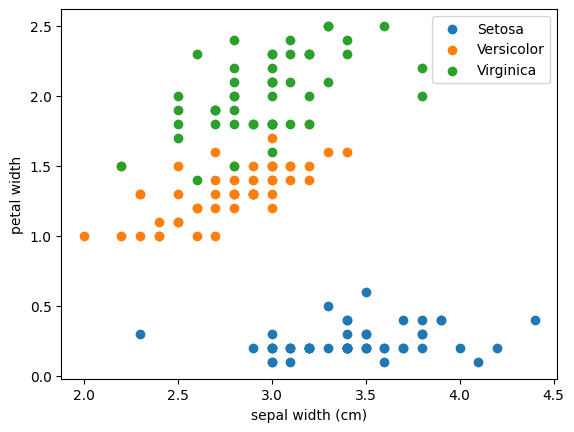

In [50]:
class_names = ['Setosa', 'Versicolor', 'Virginica']

for i, class_name in enumerate(class_names):
    plt.scatter(X[y == i, 0], X[y == i, 1], label=class_name)

plt.xlabel("sepal width (cm)")
plt.ylabel("petal width")
plt.legend()
plt.show()

#### SoftMax

- `sklearn` does this automatically with Logistic Regression

In [51]:
lr = LogisticRegression(random_state=0).fit(X, y)
lr

LogisticRegression(random_state=0)

In [52]:
probability = lr.predict_proba(X)
probability[:10]

array([[9.57579132e-01, 4.23242810e-02, 9.65866230e-05],
       [8.83098199e-01, 1.16656854e-01, 2.44946892e-04],
       [9.21287507e-01, 7.85419909e-02, 1.70502152e-04],
       [9.03874552e-01, 9.59206586e-02, 2.04789162e-04],
       [9.65633406e-01, 3.42870348e-02, 7.95592106e-05],
       [9.63699146e-01, 3.60937356e-02, 2.07117855e-04],
       [9.27000973e-01, 7.27485992e-02, 2.50427347e-04],
       [9.47739360e-01, 5.21436109e-02, 1.17029500e-04],
       [8.58534037e-01, 1.41174432e-01, 2.91530889e-04],
       [9.30662518e-01, 6.92410996e-02, 9.63819933e-05]])

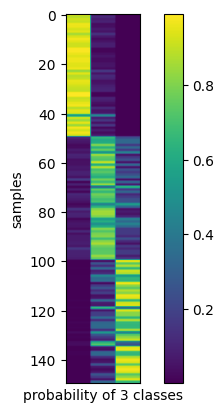

In [53]:
plot_probability_array(X, probability)

In [54]:
softmax_prediction = np.argmax(probability, axis=1)
softmax_prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [55]:
# manual accuracy
(softmax_prediction == y).sum() / len(y)

0.96

In [56]:
y_hat = lr.predict(X)
y_hat

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [57]:
accuracy_score(y, y_hat)

0.96

#### SVM

- We can't use SoftMax regression for SVMs

In [58]:
model = SVC(kernel='linear', gamma=0.5, probability=True)
model.fit(X, y)

SVC(gamma=0.5, kernel='linear', probability=True)

In [59]:
y_hat = model.predict(X)
y_hat

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [60]:
(y_hat == y).sum() / len(y), accuracy_score(y, y_hat)

(0.96, 0.96)

{0, 1, 2}


<ipython-input-45-6c39601bfd78>:32: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], label=y, cmap=plt.cm.RdYlBu, edgecolor='black', s=15)


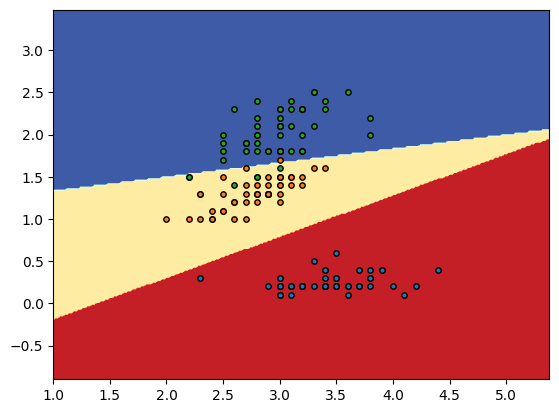

In [61]:
decision_boundary(X, y, model, iris)

#### One vs. All (One vs. Rest)

In [62]:
dummy_class = y.max() + 1
dummy_class

3

{0, 1, 2}


<ipython-input-45-6c39601bfd78>:32: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], label=y, cmap=plt.cm.RdYlBu, edgecolor='black', s=15)


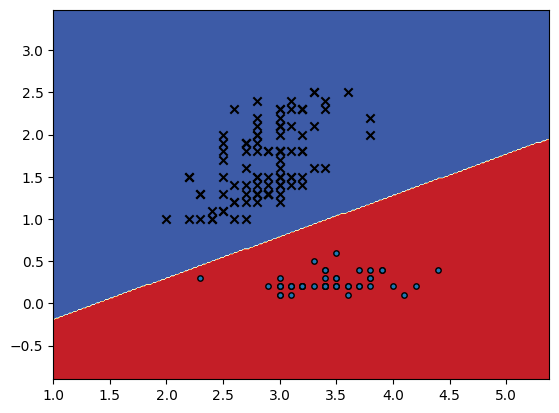

{0, 1, 2}


<ipython-input-45-6c39601bfd78>:32: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], label=y, cmap=plt.cm.RdYlBu, edgecolor='black', s=15)


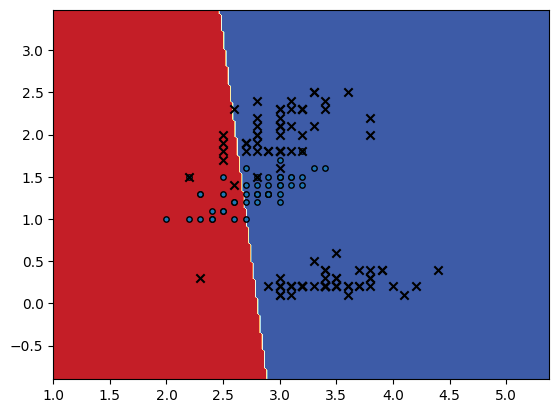

{0, 1, 2}


<ipython-input-45-6c39601bfd78>:32: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], label=y, cmap=plt.cm.RdYlBu, edgecolor='black', s=15)


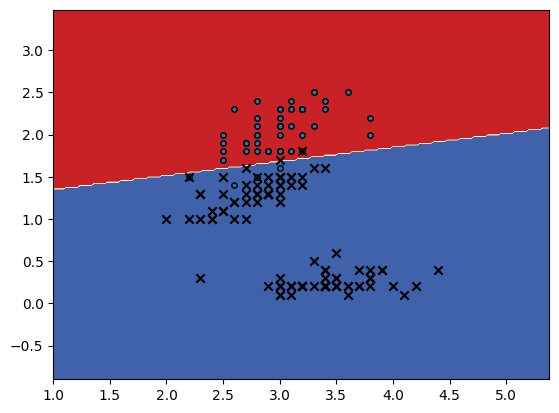

In [63]:
my_models = []

for class_ in np.unique(y):
    temp_y = np.zeros(y.shape)
    temp_y[y == class_] = class_
    temp_y[y != class_] = dummy_class

    model = SVC(kernel='linear', gamma=0.5, probability=True)
    my_models.append(model.fit(X, temp_y))
    decision_boundary(X, temp_y,model, iris)

In [64]:
my_models

[SVC(gamma=0.5, kernel='linear', probability=True),
 SVC(gamma=0.5, kernel='linear', probability=True),
 SVC(gamma=0.5, kernel='linear', probability=True)]

In [65]:
probability_array = np.zeros((X.shape[0], 3))

for j, model in enumerate(my_models):
    real_class = np.where(np.array(model.classes_) != dummy_class)[0]
    probs = model.predict_proba(X)
    print(probs[0], 'Sum: ', probs[0].sum())
    print(probs[:, real_class][0])
    print(probs[:, real_class][:, 0][0])

    probability_array[:,j] = model.predict_proba(X)[:, real_class][:, 0]
    print(probability_array[0])
    print("\n____")


[0.99134633 0.00865367] Sum:  1.0
[0.99134633]
0.9913463332219712
[0.99134633 0.         0.        ]

____
[0.10684009 0.89315991] Sum:  1.0
[0.10684009]
0.1068400896003677
[0.99134633 0.10684009 0.        ]

____
[1.07390374e-11 1.00000000e+00] Sum:  1.0
[1.07390374e-11]
1.0739037369407297e-11
[9.91346333e-01 1.06840090e-01 1.07390374e-11]

____


In [66]:
probability_array[0, :]

array([9.91346333e-01, 1.06840090e-01, 1.07390374e-11])

In [67]:
# does not sum to 1 because
#. each is the probability of belonging to the actual class,
#. not the dummy class
probability_array[0, :].sum()

1.0981864228330778

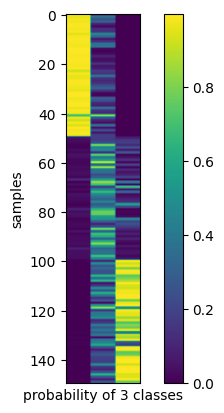

In [68]:
plot_probability_array(X, probability_array)

In [69]:
one_vs_all = np.argmax(probability_array, axis=1)
one_vs_all

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [70]:
(one_vs_all == y).sum() / len(y), accuracy_score(y, one_vs_all)

(0.9466666666666667, 0.9466666666666667)

#### One vs. One

In [71]:
classes_ = set(np.unique(y))
classes_

{0, 1, 2}

In [72]:
# determine the number of classifiers
K = len(classes_)
K * (K - 1) / 2

3.0

class 0 vs class 1 


<ipython-input-45-6c39601bfd78>:20: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], label=y,cmap=plt.cm.RdYlBu, s=15)


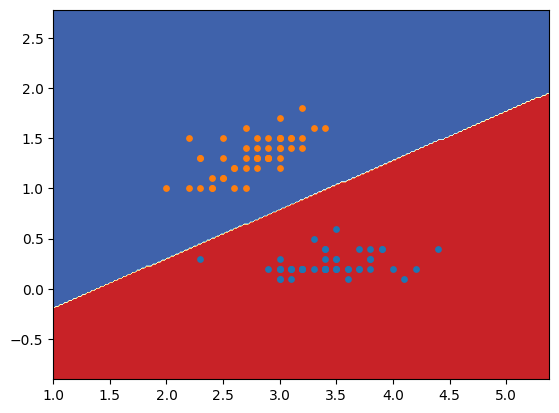

class 0 vs class 2 


<ipython-input-45-6c39601bfd78>:20: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], label=y,cmap=plt.cm.RdYlBu, s=15)


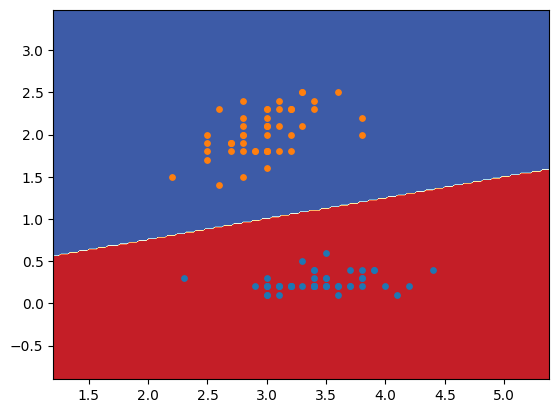

class 1 vs class 2 


<ipython-input-45-6c39601bfd78>:20: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], label=y,cmap=plt.cm.RdYlBu, s=15)


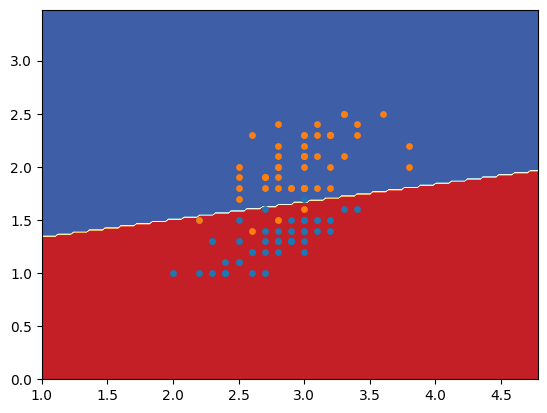

In [73]:
pairs = []
left_overs = classes_.copy()
my_models = []

for class_ in classes_:
    left_overs.remove(class_)

    for second_class in left_overs:
        pairs.append(str(class_) + ' and ' + str(second_class))
        print('class {} vs class {} '.format(class_, second_class))

        temp_y = np.zeros(y.shape)
        select = np.logical_or(y == class_, y== second_class)

        model = SVC(kernel='linear', gamma=0.5, probability=True)
        model.fit(X[select, :], y[select])
        my_models.append(model)
        decision_boundary(X[select,:], y[select], model, iris, two=True)

In [74]:
pairs

['0 and 1', '0 and 2', '1 and 2']

In [75]:
majority_vote_array = np.zeros((X.shape[0], 3))
majority_vote_dict = {}

for j, (model, pair) in enumerate(zip(my_models, pairs)):
    majority_vote_dict[pair] = model.predict(X)
    majority_vote_array[:, j] = model.predict(X)

In [76]:
pd.DataFrame(majority_vote_dict)

,0 and 1,0 and 2,1 and 2
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
145,1,2,2
146,1,2,2
147,1,2,2
148,1,2,2


In [77]:
one_vs_one = np.array([np.bincount(sample.astype(int)).argmax() for sample in majority_vote_array])
one_vs_one

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [78]:
(one_vs_one == y).sum() / len(y), accuracy_score(y, one_vs_one)

(0.96, 0.96)

### 1.4.3.3 Lab - GridSearchCV and Hyperparameter Tuning in Machine Learning

#### Objectives

At the end of this reading, you will be able to:

- Explain the concept of GridSearchCV
- Identify scenarios where GridSearchCV can be useful
- Use GridSearchCV to perform hyperparameter tuning for machine learning models


#### Introduction to GridSearchCV

GridSearchCV in Scikit-Learn is a vital tool for hyperparameter tuning, performing an exhaustive search over specified parameter values for an estimator. It systematically evaluates each combination using cross-validation to identify the optimal settings that maximize model performance based on a scoring metric like accuracy or F1-score. Hyperparameter tuning is crucial as it significantly impacts model performance, preventing underfitting or overfitting. GridSearchCV automates this process, ensuring robust generalization on unseen data. It helps data scientists efficiently find the best hyperparameters, saving time and resources while optimizing model performance, making it an essential tool in the machine learning pipeline.

#### Parameters of GridSearchCV

- **estimator**: the model or pipeline to be optimized
- **param_grid**: A dictionary or list of dictionaries with parameter names (as strings) as keys and lists of parameter settings to try as values. Using `param_grid`, you can specify the hyperparameters for various models to find the optimal combination.
- **scoring**: A single string or callable to evaluate the predictions on the test set. Common options include `accuracy`, `f1`, `oc_auc`, etc. If none, the estimator's default scorer is used
- **n_jobs**: The number of jobs to run in parallel. `-1` means using all processors.
- **pre_dispatch**: Controls the number of jobs that get dispatched during parallel execution. It can be an integer or expressions like `2n_jobs`, `3n_jobs`, etc., to limit the number of jobs dispatched at once
- **refit**:  If `True`, refits the best estimator with the entire dataset. The best estimator is stored in the `best_estimator_` attribute. Default is `True`
- **cv**:  Determines the cross-validation splitting strategy. It can be an integer to specify the number of folds, a cross-validation generator, or an iterable. Default is `5-fold cross-validation`
- **verbose**: controls the verbosity level, 0 is silent
- **return_train_score**: If `False`, the `cv_results_` attribute will not include training scores. Default is `False`
- **error_score**: Value to assign to the score if an error occurs in estimator fitting. `np.nan` is the default, but it can be set to a specific value.

#### `param_grid` Examples

##### Logistic Regression

```python
 parameters = {'C': [0.01, 0.1, 1],
              'penalty': ['l2'],
              'solver': ['lbfgs']
```

- `C`: Inverse of regularization strength; smaller values specify stronger regularization.
- `penalty`: Specifies the norm of the penalty; 'l2' is ridge regression.
- `solver`: Algorithm to use in the optimization problem.

##### Support Vector Machine

```python
parameters = {'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
              'C': np.logspace(-3, 3, 5),
              'gamma': np.logspace(-3, 3, 5)}
```

- `kernel`: Specifies the kernel type to be used in the algorithm.
- `C`: Regularization parameter.
- `gamma`: Kernel coefficient.

##### Decision Tree Classifier

```python
parameters = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'max_depth': [2*n for n in range(1, 10)],
              'max_features': ['auto', 'sqrt'],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10]}
```

- `criterion`: The function to measure the quality of a split.
- `splitter`: The strategy used to choose the split at each node.
- `max_depth`: The maximum depth of the tree.
- `max_features`: The number of features to consider when looking for the best split.
- `min_samples_leaf`: The minimum number of samples required to be at a leaf node.
- `min_samples_split`: The minimum number of samples required to split an internal node.

##### K-Nearest Neighbors

```python
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1, 2]}
```

- `n_neighbors`: Number of neighbors to use.
- `algorithm`: Algorithm used to compute the nearest neighbors.
- `p`: Power parameter for the Minkowski metric.


#### Appliations and Advnagtages of GridSearchCV

- **Model Selection**: GridSearchCV enables the comparison of multiple models and facilitates the selection of the best-performing one for a given data set.
- **Hyperparameter Tuning**: It automates the process of finding the optimal hyperparameters, which can significantly improve the performance of machine learning models.
- **Pipeline Optimization**: GridSearchCV can be applied to complex pipelines involving multiple preprocessing steps and models to optimize the entire workflow.
- **Cross-Validation**: It incorporates cross-validation in the parameter search process, ensuring that the model's performance is robust and not overfitted to a particular train-test split.
- **Exhaustive Search**: GridSearchCV performs an exhaustive search over the specified parameter grid, ensuring that the best combination of parameters is found.
- **Parallel Execution**: With the n_jobs parameter, it can leverage multiple processors to speed up the search process.
- **Automatic Refit**: By setting refit=True, GridSearchCV automatically refits the model with the best parameters on the entire data set, making it ready for use.
- **Detailed Output**: The cv_results_ attribute provides detailed information about the performance of each parameter combination, including training and validation scores, which helps in understanding the model's behavior.

In [79]:
iris = datasets.load_iris(as_frame=True)

X = iris.data
y = iris.target

In [80]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [81]:
y

,target
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [83]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf', 'poly']
}

In [84]:
svc = SVC()
svc

SVC()

In [85]:
# initialize GridSearchCV
grid_search = GridSearchCV(estimator=svc,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,
                           n_jobs=-1,
                           verbose=2)

grid_search

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy', verbose=2)

In [86]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy', verbose=2)

In [87]:
grid_search.best_params_

{'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}

In [88]:
grid_search.best_estimator_

SVC(C=0.1, gamma=0.1, kernel='poly')

In [89]:
y_pred = grid_search.best_estimator_.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [90]:
# manual accuracy
(y_test == y_pred).sum() / len(y_test)

1.0

In [91]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

